In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

## Load Data

In [2]:
data = pd.read_csv('../datasets/houseprice.csv')
data.shape

(1460, 81)

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [6]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Scale Features

In [7]:
# scale data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## Feature Selection

In [8]:
# LinearRegression in sklearn is a non-regularized linear model. 
# It fits by matrix multiplication and not gradient descent. 
# Therefore, we don't need to specify penalty and other parameters. 

sel_ = SelectFromModel(LinearRegression())
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LinearRegression())

In [9]:
selected_feat = X_train.columns[sel_.get_support()]
selected_feat

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea'],
      dtype='object')

## Compare Coefficient Magnitude

The above `SelectFromModel` uses the mean absolute coefficients as the cutoff. Let's double check if the number of selected features corresponds to the criteria.

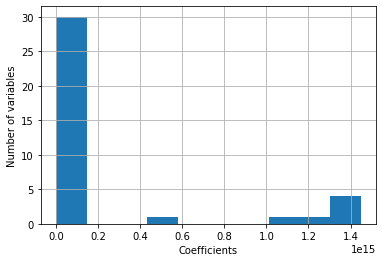

In [12]:
pd.Series(np.abs(sel_.estimator_.coef_)).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [14]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7
